In [1]:
import gpxpy
import pandas as pd
import matplotlib.pyplot as plt

## open gpx file

In [2]:
gpx_file = open('gpx/2018._gada_27._jūl._12_12_35.gpx', 'r')
gpx = gpxpy.parse(gpx_file)

In [3]:
print(len(gpx.tracks))
print(len(gpx.tracks[0].segments))
print(len(gpx.tracks[0].segments[0].points))

1
1
2929


In [4]:
data = gpx.tracks[0].segments[0].points

In [5]:
data[:3]

[GPXTrackPoint(56.634815, 23.619427, elevation=26.0, time=datetime.datetime(2018, 7, 27, 9, 12, 36)),
 GPXTrackPoint(56.63493, 23.619417, elevation=25.0, time=datetime.datetime(2018, 7, 27, 9, 12, 40)),
 GPXTrackPoint(56.63504, 23.619452, elevation=24.0, time=datetime.datetime(2018, 7, 27, 9, 12, 43))]

#### append points to dataframe

In [6]:
df = pd.DataFrame(columns=['lon', 'lat', 'alt', 'time'])
for point in data:
    df = df.append({'lon': point.longitude, 'lat' : point.latitude,
                    'alt' : point.elevation, 'time' : point.time}, ignore_index=True)

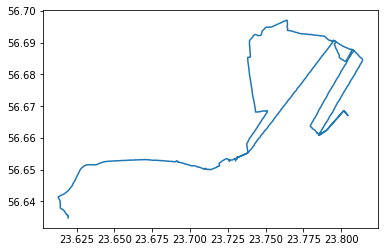

In [7]:
plt.plot(df['lon'], df['lat'])

In [25]:
df[:5]

,lon,lat,alt,time
0,23.619427,56.634815,26.0,2018-07-27 09:12:36
1,23.619417,56.634930,25.0,2018-07-27 09:12:40
2,23.619452,56.635040,24.0,2018-07-27 09:12:43
3,23.619511,56.635124,24.0,2018-07-27 09:12:46
4,23.619619,56.635208,26.0,2018-07-27 09:12:51


### another approach to open file, adding point speed

In [10]:
gpx = gpxpy.parse(open('gpx/2018._gada_27._jūl._12_12_35.gpx'))

In [11]:
print("{} track(s)".format(len(gpx.tracks)))
track = gpx.tracks[0]
print("{} segment(s)".format(len(track.segments)))
segment = track.segments[0]
print("{} point(s)".format(len(segment.points)))

1 track(s)
1 segment(s)
2929 point(s)


In [12]:
track.segments[0].points[:3]

[GPXTrackPoint(56.634815, 23.619427, elevation=26.0, time=datetime.datetime(2018, 7, 27, 9, 12, 36)),
 GPXTrackPoint(56.63493, 23.619417, elevation=25.0, time=datetime.datetime(2018, 7, 27, 9, 12, 40)),
 GPXTrackPoint(56.63504, 23.619452, elevation=24.0, time=datetime.datetime(2018, 7, 27, 9, 12, 43))]

In [13]:
data = []
segment_length = segment.length_3d()
for point_idx, point in enumerate(segment.points):
    data.append([point.longitude, point.latitude,
                 point.elevation, point.time, segment.get_speed(point_idx)])
    
from pandas import DataFrame

columns = ['Longitude', 'Latitude', 'Altitude', 'Time', 'Speed']
df = DataFrame(data, columns=columns)
df.head()

,Longitude,Latitude,Altitude,Time,Speed
0,23.619427,56.634815,26.0,2018-07-27 09:12:36,3.213831
1,23.619417,56.634930,25.0,2018-07-27 09:12:40,3.685478
2,23.619452,56.635040,24.0,2018-07-27 09:12:43,3.749270
3,23.619511,56.635124,24.0,2018-07-27 09:12:46,2.833277
4,23.619619,56.635208,26.0,2018-07-27 09:12:51,2.781554


#### plot using lon and lat coordinates

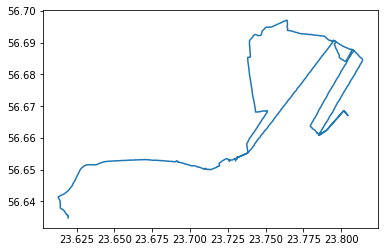

In [14]:
plt.plot(df['Longitude'], df['Latitude'])

In [31]:
df['Speed'].mean()

6.2356685216551755

In [32]:
18264.27309992801 / 2927

6.239929313265463

### Plot track on map

In [15]:
import numpy as np
import seawater as sw
from oceans.filters import smoo1

_, angles = sw.dist(df['Latitude'], df['Longitude'])
angles = np.r_[0, np.deg2rad(angles)]

# Normalize the speed to use as the length of the arrows
r = df['Speed'] / df['Speed'].max()
kw = dict(window_len=31, window='hanning')
df['u'] = smoo1(r * np.cos(angles), **kw)
df['v'] = smoo1(r * np.sin(angles), **kw)

In [16]:
import mplleaflet

In [17]:
plt.rcParams["figure.figsize"] = (18,10)
fig, ax = plt.subplots()
df = df.dropna()
ax.plot(df['Longitude'], df['Latitude'],
        color='darkorange', linewidth=1, alpha=0.5)
sub = 10
ax.quiver(df['Longitude'][::sub], df['Latitude'][::sub], df['u'][::sub], df['v'][::sub], color='deepskyblue', alpha=0.8, scale=10)
mplleaflet.display(fig=fig, tiles='esri_aerial')
